In [17]:
import numpy as np
import random


distancefile = open("distance.csv")
distance_array = np.loadtxt(distancefile, delimiter=",")

flowfile = open("flow.csv")
flow_array = np.loadtxt(flowfile, delimiter=",")



initiallayout = np.zeros(shape=(4,5))

locations = list(range(0, 20))

random.shuffle(locations)

for i, row in enumerate(initiallayout):
    random = locations[:5] 
    del locations[:5]
    initiallayout[i] = random






def tabusearch(initiallayout, distancearray, flowarray):
    
    layout = initiallayout
    cost = search_cost(layout)
    print(cost)
    

    

    
    
    
def search_cost(layout):
    
    searchcost= 0
    layout = list(layout.flatten())
    for x in range(20):
        for y in range(20):
            searchcost +=  flow_array[int(layout[x])][int(layout[y])] * distance_array[x][y]
    return searchcost
    

tabusearch(initiallayout, distance_array, flow_array)
    

3418.0


3160
3032
2924
2852
2788
2770
2762
2754
2722
2730
2722
2730
2736
2740
2728
2760
2704
2666
2678
2696
2678
2698
2706
2690
2678
2704
2686
2680
2692
2696
2702
2698
2706
2696
2708
2706
2714
2710
2724
2744
2730
2738
2730
2722
2708
2692
2684
2692
2682
2694
2702
2716
2736
2722
2730
2712
2704
2690
2674
2666
2674
2684
2694
2706
2688
2680
2670
2640
2634
2658
2634
2654
2634
2626
2638
2640
2620
2624
2660
2624
2636
2624
2636
2646
2634
2622
2634
2646
2636
2668
2684
2654
2662
2650
2662
2654
2666
2650
2666
2690
2670
2646
2658
2646
2664
2646
2654
2646
2666
2646
2670
2646
2658
2646
2664
2646
2654
2646
2666
2646
2670
2646
2658
2646
2664
2646
2654
2646
2666
2646
2670
2646
2658
2646
2664
2646
2654
2646
2666
2646
2670
2646
2658
2646
2664
2646
2654
2646
2666
2646
2670
2646
2658
2646
2664
2646
2654
2646
2654
2646
2670
2688
2670
2678
2666
2650
2658
2646
2634
2646
2658
2646
2636
2624
2620
2624
2620
2614
2634
2614
2644
2614
2620
2624
2620
2632
2620
2632
2628
2632
2628
2632
2620
2624
2654
2624
2636
2624
2620
2632


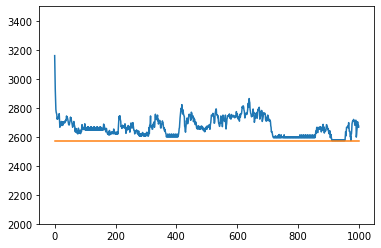

{'cost': 2574, 'iterations': 1000, 'instance': [8, 2, 13, 1, 17, 15, 9, 11, 14, 18, 12, 10, 7, 19, 3, 5, 0, 4, 6, 16]}
Initial: [14, 10, 12, 11, 15, 5, 9, 7, 4, 2, 17, 1, 0, 6, 8, 16, 13, 19, 18, 3]


In [21]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 27 10:59:15 2016
@author: akshaybudhkar
Best so far: {'instance': [17, 13, 9, 2, 8, 3, 1, 11, 10, 15, 18, 14, 19, 7, 12, 16, 4, 6, 0, 5], 'cost': 2570, 'iterations': 350}
"""
import csv
import random
import matplotlib.pyplot as plt

# Returns a column of a matrix as a list 
def get_column(index, matrix):
    return [row[index] for row in matrix]

# Uses the standard way to calculate cost in a QAP problem
def calculate_cost(instance, flow_arr, distance_arr):
    permutation_flow = [[0 for i in range(20)] for j in range(20)]
    permut_flow_permut = [[0 for i in range(20)] for j in range(20)]
    cost = 0
    
    #PF
    for i in range(len(instance)):
        permutation_flow[i] = flow_arr[instance[i]]

    #PFP
    for i in range(len(instance)):
        flow_col = get_column(instance[i], permutation_flow)
        
        for j in range(len(permut_flow_permut)):
            permut_flow_permut[j][i] = flow_col[j]

    #PFP * D
    for i in range(len(distance_arr)):
        row_cost = 0
        for j in range(len(distance_arr[0])):
            row_cost += permut_flow_permut[i][j] * distance_arr[i][j]

        cost += row_cost

    return cost
    
""" 
Gives the most optimal neighbor in a neighborhood
Takes into account tabued options and aspirations
"""
def get_most_optimal_neighbor(instance, flow_arr, distance_arr, tabu_matrix, tabu_size, best):
    best_cost = float("inf")
    best_instance = None
    
    # Check for every possible switch
    for i in range(len(instance)):
        # limit = random.randint(1, 20)
        # change to range(limit) to limit the neighbourhood
        for j in range(len(instance)):
            # Don't switch with itself
            if j > i:
                new_instance = instance[:]
                new_instance[i], new_instance[j] = new_instance[j], new_instance[i]
                new_cost = calculate_cost(new_instance, flow_arr, distance_arr)
                
                # Check if better than best so far and if not tabued (taking into account aspiration)
                if new_cost < best_cost:
                    if (tabu_matrix[new_instance[i]][i] == 0 and tabu_matrix[new_instance[j]][j] == 0)\
                    or (new_instance == best and tabu_matrix[new_instance[i]][i] < 3 and tabu_matrix[new_instance[j]][j] < 3):
                        best_cost = new_cost
                        best_instance = new_instance
                        tabu_matrix[new_instance[j]][j] = tabu_size
                        tabu_matrix[new_instance[i]][i] = tabu_size
    
    print(best_cost)
    return best_instance

# Decrement elements tabued in a matrix    
def decrement_tabu(matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] > 0:
                matrix[i][j] -= 1
    return matrix

# Implements standard Tabu search to get the most optimal solution
def tabu_search(instance, flow_arr, distance_arr, tabu_matrix):
    current = instance
    current_cost = calculate_cost(current, flow_arr, distance_arr)
    best_cost = current_cost
    iterations = 0
    tabu_size = 8
    best = instance
    costs = [] # For plottinh purposes
    
    # Waiting condition = if we reach optimal or we ~1k iterations
    while current_cost > 2570 and iterations < 1000:
        current = get_most_optimal_neighbor(current, flow_arr, distance_arr, tabu_matrix, tabu_size, best)
        current_cost = calculate_cost(current, flow_arr, distance_arr)
        
        tabu_matrix = decrement_tabu(tabu_matrix)

        # Dynamic tabu tenure
        if iterations % 50 == 0:
            tabu_size = random.randint(1, 20)        
        
        if current_cost < best_cost:
            # Diversification
            if iterations > 250 or current_cost < 2600:
                best_cost = current_cost
                best = current
            else:
                best = []

        iterations += 1        
        costs.append(current_cost)
        
    plt.plot(costs)
    plt.ylim([2000, 3500])
    plt.plot((0, 1000), (2570, 2570)) #Ideal
    plt.show()
    
    # Return the best ever
    return {'cost': best_cost,
            'iterations': iterations,
            'instance': best}
    
# Initial flow and distance arrays setup
flow_file = open('flow.csv', 'r')
distance_file = open('distance.csv', 'r')

flow_arr = []
distance_arr = []

flow_reader = csv.reader(flow_file)
distance_reader = csv.reader(distance_file)

for row in flow_reader:
    flow_arr.append([int(x) for x in row])

for row in distance_reader:
    distance_arr.append([int(x) for x in row])    

""" 
Initial tabu structure
Defined as departments as rows and locations as columns (a 2D Dimensional Array)
"""
tabu_matrix = [[0 for i in range(20)] for j in range(20)]

init_soln = [i for i in range(20)]

# Shuffle for random initial solution
random.shuffle(init_soln)

print(tabu_search(init_soln, flow_arr, distance_arr, tabu_matrix))
print("Initial: " + str(init_soln))